#A handy tutorial and tools for creating Python packages for your code

This tutorial was created by Zach Thatcher and Simon J. L. Billinge of Columbia University for the 2021 IUCr computational crystallography school.  It is free to use and reuse subject to the terms of the BSD 3-clause license:
```
Copyright 2021 Trustees of Columbia University in the City of New York

Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its contributors may be used to endorse or promote products derived from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
```

The following notebook is written to help you easily set up and create your own properly packaged software projects just as described in Simon's slides. For example, you could (should?) create a `<yourname>_utils` package as a handy place to (for the rest of your life) add modules of code that you will reuse in other projects by typing `from <yourname>_utils import <useful_module>`.  But you can also take projects, such as a data analysis campaign associated with a manuscript, or a handy app for choosing the best local restaurant in your area, and package it for sharing.  In fact, this makes it sufficiently easy that you should pretty much consider setting up a package for just about every programming project.

As an example, we will create a CLI (command line interface) driven package called "iucr_pack", taking it all the way so that it is pushed to GitHub. 

In order to share it with you in a way that we know it will work, we created it in Google Colab, which means that all the files will be created on the Colab virtual machine in the Google cloud and not on your local computer.  Later, to reuse this on your computer, you could extract the jupyter notebook and run it on your own computer  in which case it will create the files directly on your own filesystem.  Or you can run it on Google Colab all the way to creating the project on your GitHub account, and then simply clone that repo to your local computer and continue to work on it from there.  

To get warmed up, and used to interacting with the interface to the file-system on your Google Colab virtual machine, look directly to your left as you read this and look for the (folder icon) and try clicking around in there.  This contains some files that Google loads by default.  To get used to the interface try double clicking anscombe.json in the sample_data folder to get the idea.

---

Another special aspect of running on a Colab VM is that all of the commands that would normally be copy-pasted into your terminal and run there will be run directly in google colab with an exclamation point in front.

e.g.
```python
!ls
```

Using Colab takes out the upfront cost of installing python and git on everyone's computer at the school, but instructions on how to do so are included in case you need them. Users are highly encouraged to install these tools locally, outside of the lecture, such that they can recreate this workflow on your local machine.

---

This exercise can get across important tools for creating a package without reaching the github integration, but not to do so would be a shame as the cookiecutter that we discuss below will automatically generate all of the infrastructure needed to enable what is known as "continuous integration testing and deployment" when pushed to GitHub. If this does not excite you, it will soon (after the test driven development CrystHack).

In order to integrate with GitHub, the user is encouraged to create a new public repository on your GitHub account named "iucr_pack"

#Tools

In this tutorial, we will be mainly interfacing with git (version control software), cookiecutter (a nifty set of python packages), and travis (continuous-integration/continuous-development) directly.

A number of nearly self-explanatory tools will also be made available to us, such as versioneer and sphinx, by virtue of our utilization of the cookiecutter tool.

We will be using a cookicutter tool developed by the National Light Source II (NSLS-II) (Brookhaven National Laboratory)'s Daniel Allen and his fellow contributors. For more details and additional instructions, see: https://nsls-ii.github.io/scientific-python-cookiecutter/index.html

#Local Setup (optional).  Use these instructions to get your local computer set up after the lecture if you want to be able to build packages directly on your local comptuer.

Ensure that you have miniconda and a nice IDE (development environment such as a fancy text editor) installed (or a venv (virtual environment) manager of your choice, provided you know how to use it). 

We prefer pycharm as our IDE. If you don't have an IDE, a nice text editor will suffice.

## Installing miniconda

If you are downloading miniconda for the first time, make sure to add 
```path
c:\\Users\<YourUsername>\Miniconda3\Scripts
```
To your PATH environment variable


> system -> advanced system settings -> environment variables -> path (top table) -> edit -> new -> paste the path, press ok. 
Then go to the command prompt and type
```bash
$activate
```
At which point you will see
```bash
(base)$
```
Search "conda cheat sheet" on google for future reference

## Install GIT
Ensure that you have git installed on your computer as well. https://git-scm.com/downloads

The git installer will provide numerous options for installation, most of which can be changed later on. Feel free to utilize the following youtube video to guide your installation process https://www.youtube.com/watch?v=nbFwejIsHlY

## Create an Environment

```shell
$conda create -n packaging python=3.8
```
followed by enter, to approve the creation
```shell
$conda activate packaging
```
We are now in out conda environment, time to install cookiecutter.
###Be a pro and install mamba
Install mamba first. mamba is conda, but faster! 
```shell
$conda install mamba
```
followed by enter, to approve the installation
```shell
$mamba install cookiecutter
```
followed by enter, to approve the installation


#Running Cookiecutter

## Set up a GIT repo and Travis for Ultimate Satisfaction

At this point, it is encouraged to get a personal access token from GitHub such that the user can reach their account on GitHub directly from this Google Colab notebook.

To do so, go to your GitHub account, setting, developer settings, personal access tokens, and create a token with a 7 day timelimit and Repo privileges. Save the UUID and paste somewhere for future reference 

---

Next go to your account on GitHub and create a new repo. If you call the repo "iucr_pack", everything other than the cookiecutter interface will work automatically. Keep the name in mind.

It is also encouraged to go to travis-ci.com and sign in with your GitHub credentials, then connect your repositories to travis.  Travis is a service for doing "continuous integration" (CI) that runs tests on your code each time you push commits to GitHub.  It is strongly recommended (essential?) for professional grade code that you will share with others.  For open source software it is possible to get Travis services for free.

See below for a few images of how to connect travis to github and/or github to travis

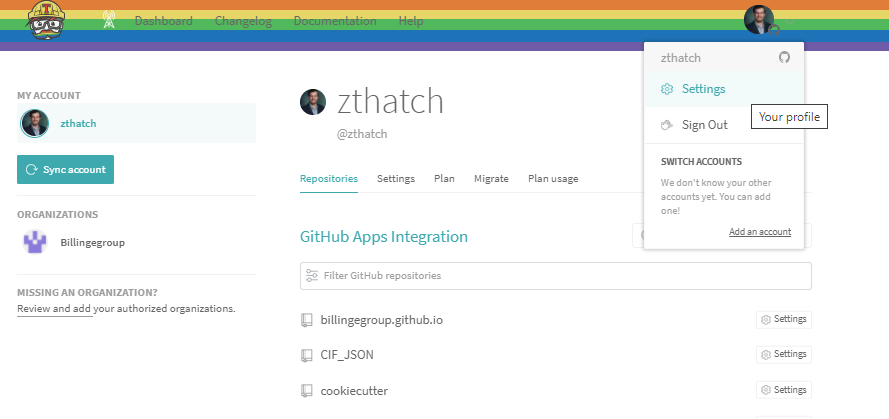

This way, .travis files will automatically be detected on "push" and travis will start running tests from the getgo.



## Commands 
 

1.   Run these directly in Google Colab (preferred) by copying this notebook to your own Google Drive (see button above), editing the cells where appropriate and then running the cells by clicking the play button, or
2.   if your local computer is set up with miniconda etc., copy and paste the commands into a terminal on your computer, remove the "!" from the beginning of each line, and hit enter

First fill in the bracketed fields below with your specific information and then run the cells by clicking the "play" button

In [ ]:
!git config --global user.email "<your email address>"
!git config --global user.name "<your name>"

In [ ]:
!pip install cookiecutter
# or conda install, but conda is not in google colab... however, google has all the answers https://towardsdatascience.com/conda-google-colab-75f7c867a522

In the following cell, when prompted for your project name, click on the blinking black box to reveal a text box and type in the requested information. Use your chosen project name, or if you are following the instructions directly use "iucr_pack" for (all) the name(s). 

In [ ]:
!cookiecutter https://github.com/NSLS-II/scientific-python-cookiecutter

###package_dist_name 

> The name to use when you pip install ___. Dashes and underscores are allowed. Dashes are conventional. Case insensitive.
###package_dir_name
> The name to use when you import ___ in Python. Underscores are the only punctuation allowed. Conventionally lowercase.



Congrats. You have created your first package.  To see it, click on the folder icon and look for the package name (e.g., `iucr_pack`) and navigate around, looking at what is written in all the files and so on.  This is the power of using the handy NSLS-II cookiecutter to build your package template.

Next we will start to fill the package in with code, so first, let's write some code....

#Filling in the package (2 file changes)

##Time to Insert Code
Now, we are going to actually add some useful code to our package that processes json files. If you haven't noticed yet, there is some sample data to our left in the sample_data directory. Present here is the Anscombe's quartet. 

We are going to write a command line interface package that runs statistical analysis on the quartet and plots it. 

It should be easy to imagine the utility of writing a package that takes in json files from any given directory with a similar set of keys and automatically analyzes and plots them.

See below a scrip that does what we had in mind. Feel free to run it.

In [ ]:
# Import the required libraries
import pandas as pd
import statistics
from scipy.stats import pearsonr
from matplotlib import pyplot as plt
import numpy as np

#Define some functions for plotting

def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
  
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x

    return (b_0, b_1)

def plot_regression_line(x, b, axs):  
    # predicted response vector
    y_pred = b[0] + b[1]*x
  
    # plotting the regression line
    axs.plot(x, y_pred, color = "g")
  
# Import the csv file
df = pd.read_json("sample_data/anscombe.json")

unique_series = df.Series.unique()

fig, axs = plt.subplots(len(unique_series), figsize=(5,10))

fig.suptitle('Anscombe Data')

for i, series in enumerate(unique_series):
  # Convert pandas dataframe into pandas series
  list1 = df.loc[lambda df: df['Series'] == series, 'X']
  list2 = df.loc[lambda df: df['Series'] == series, 'Y']
  print(f"Series: {series}")
  # Calculating mean for x1
  print('X Mean: %.1f' % statistics.mean(list1))
    
  # Calculating standard deviation for x1
  print('X STDV: %.2f' % statistics.stdev(list1))
    
  # Calculating mean for y1
  print('Y Mean: %.1f' % statistics.mean(list2))
    
  # Calculating standard deviation for y1
  print('Y STDV: %.2f' % statistics.stdev(list2))
    
  # Calculating pearson correlation
  corr, _ = pearsonr(list1, list2)
  print('Pearson Correlation: %.3f\n\n' % corr)
  axs[i].scatter(list1, list2)
  b = estimate_coef(list1, list2)
  plot_regression_line(list1, b, axs[i])

plt.show

Awesome, we wrote a program!  But that was the old us...now we want to write reusable code.

We will take that script and turn it into "code"!

We will reformat it  so that it takes the form of a command line program that will take in a filename of a json file from the user when it is run and then do its stuff. 

You cannot run the below cell, because it is meant to be run as a python file. 

Copy and paste the below into a file that you create in the 
```path
repoName/packageName 
```
e.g., 
```
iucr_pack/iucr_pack
```
directory called cli.py
(to do this, click on the folder icon and navigate to the right place. After selecting the folder named `iucr_pack` click on the dot-dot-dot and select `new file`.  Paste the code into the new file that is open to the right.)

In [ ]:
import argparse

import sys

# Import the required libraries
import pandas as pd
import statistics
from scipy.stats import pearsonr
from matplotlib import pyplot as plt
import numpy as np

#Define some functions for plotting

def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
  
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x

    return (b_0, b_1)


def plot_regression_line(x, b, axs):  
    # predicted response vector
    y_pred = b[0] + b[1]*x
  
    # plotting the regression line
    axs.plot(x, y_pred, color = "g")


def main():
    """Console script."""
    parser = argparse.ArgumentParser('A CLI for analyzing Anscombe json files')
    # add the main argument of the cli
    parser.add_argument('user_input_file', help="filename for data file")
    # add an optional argument
    parser.add_argument('--show_plot', action='store_true', help="whether or not to show plots")
    args = parser.parse_args()

    if args.user_input_file:
        # Import the csv file
        df = pd.read_json(args.user_input_file)

        unique_series = df.Series.unique()

        fig, axs = plt.subplots(len(unique_series), figsize=(5,2.5*len(unique_series)))

        fig.suptitle('Anscombe Data')

        for i, series in enumerate(unique_series):
            # Convert pandas dataframe into pandas series
            list1 = df.loc[lambda df: df['Series'] == series, 'X']
            list2 = df.loc[lambda df: df['Series'] == series, 'Y']
            print(f"Series: {series}")
            # Calculating mean for x1
            print('X Mean: %.1f' % statistics.mean(list1))
              
            # Calculating standard deviation for x1
            print('X STDV: %.2f' % statistics.stdev(list1))
              
            # Calculating mean for y1
            print('Y Mean: %.1f' % statistics.mean(list2))
              
            # Calculating standard deviation for y1
            print('Y STDV: %.2f' % statistics.stdev(list2))
              
            # Calculating pearson correlation
            corr, _ = pearsonr(list1, list2)
            print('Pearson Correlation: %.3f\n\n' % corr)
            axs[i].scatter(list1, list2)
            b = estimate_coef(list1, list2)
            plot_regression_line(list1, b, axs[i])
    else:
        print('Please provide an input file')
        return 1
    if args.show_plot:
        plt.show()
    return 0


if __name__ == "__main__":
    sys.exit(main())  # pragma: no cover


Now, edit the setup.py file in the 
`
repoName
`
directory to change the scripts list to contain
```python
    entry_points={
        'console_scripts': [
            # 'command = some.module:some_function',
        ],
    },
```
on line 47 with the following
```python
    entry_points={
        'console_scripts': [
            'iucr_pack=iucr_pack.cli:main'
        ],
    },
```
Replacing iucr_pack with your more creative name if necessary

#Installing and running our new package

Now we are ready to install the package.   When it is installed, we can do things like `from iucr_pack.cli import plot_regression_line` from anywhere on our computer, or we can run the `main()` function and have the app do its business directly from the terminal from anywhere on our computer simply by typing `iucr_pack` at the `>` prompt (or whatever your command prompt looks like).

Run the following cell to install the package in your computer. If you are doing this on your local computer, we recommend that you do the installation into a virtual environment, for example, by activating a conda environment first and then typing this command

In [ ]:
%cd iucr_pack/
!pip install -e .

the `-e` of the `pip install` installs the code by running the `setup.py` file which should be sitting in the `iucr_pack` directory where you are located.  It is the same as typing `python setup.py develop`.  In the "develop" mode, whenever you run the code, it will run the version it finds at run-time, so you can make edits to your code and then run the app and it will run the latest version including your changes.  When the code is stable and you want to share it with others, they should install it as `python setup.py install` which will install a static (stable) version.

Now, as an example of the installation, run the following

In [ ]:
!iucr_pack --help

In [ ]:
!iucr_pack ../sample_data/anscombe.json

Congrats, you have made (possibly) your first Python package!!!!

Now, we don't want to lose all that hard work.  Let's archive it and put it under version control!

#Pushing to Github

Fill in the bracketed fields below with you personal access token from GitHub (PAT) from before, and your GitHub username. 

If you've gotten creative with your project name, replace "iucr_pack" in the first and third command with your project name

In [ ]:
!git init
!git remote add origin https://<personalAccessToken>@github.com/<githubUserName>/iucr_pack.git

In [ ]:
!git add -A

In [ ]:
!git commit -m "initial commit of cli for plotting json files"

In [ ]:
!git checkout -b cookiecutter
!git push origin cookiecutter

Travis should run... and pass! (if you've connected travis to your repos with the few clicks that it takes)

OK, That's it for now.

You should be able to go to GitHub and clone the repo to your local computer and install it over there following the pip instructions (you will have to redo the install on your local computer because when we did it above, we installed it on the Google Colab VM.)

Because we made it open source with the nice friendly BSD-3 clause license and you made the GitHub repo as public, you can share the link with your friends and they can download and install it.  To make it more friendly write some words in the README.md in the top level directory telling people what the package is about and giving instructions how to install it and so on.